In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

In [68]:
df = pd.read_csv('./Afegan_Raw.csv', index_col=0, delimiter=';')

In [69]:
df.head()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,,,,,,,,,,,,,,,,,
2014,59.9,271,64,0.01,7352358168,62,492,18.6,86,58,8.18,62,327582,17.5,17.5,0.476,10.0
2013,59.9,268,66,0.01,7321924272,64,430,18.1,89,62,8.13,64,31731688,17.7,17.7,0.470,9.9
2012,59.5,272,69,0.01,781842153,67,2787,17.6,93,67,8.52,67,3696958,17.9,18.0,0.463,9.8
2011,59.2,275,71,0.01,7097108703,68,3013,17.2,97,68,7.87,68,2978599,18.2,18.2,0.454,9.5
2010,58.8,279,74,0.01,7967936736,66,1989,16.7,102,66,9.20,66,2883167,18.4,18.4,0.448,9.2


In [70]:
df.shape

(15, 17)

In [71]:
# calculando a média de cada variável
dfm = df.mean()

# calculando o desviopadrão de cada variável
dfdp = df.std()

# escalando os dados
dfauto = (df - dfm) / dfdp

In [72]:
dfauto.head()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,,,,,,,,,,,,,,,,,
2014,1.354619,0.020364,-1.789967,-0.627896,1.410223,-1.344103,-0.837956,1.601259,-1.798195,0.362721,-0.113208,0.551570,-0.713928,0.163652,0.298303,1.345650,1.236943
2013,1.354619,-0.019479,-1.556493,-0.627896,1.399983,-0.282969,-0.864588,1.360106,-1.565670,0.576086,-0.185162,0.656299,2.067607,0.197746,0.327644,1.221180,1.172294
2012,1.103764,0.033645,-1.206282,-0.627896,-0.800513,1.308732,0.147849,1.118952,-1.255636,0.842793,0.376080,0.813391,-0.415494,0.231841,0.371656,1.075967,1.107645
2011,0.915622,0.073488,-0.972808,-0.627896,1.324341,1.839299,0.244927,0.926029,-0.945603,0.896134,-0.559323,0.865756,-0.479121,0.282982,0.400998,0.889263,0.913700
2010,0.664767,0.126612,-0.622597,-0.627896,1.617342,0.778165,-0.194928,0.684876,-0.558060,0.789452,1.354654,0.761027,-0.487574,0.317076,0.430339,0.764794,0.719754


In [73]:
pca = PCA(n_components=10)

In [74]:
x = np.asanyarray(dfauto.iloc[:,0:17])

In [75]:
pca.fit(x)
pca.components_

array([[-3.33579930e-01, -3.87532739e-02,  3.07731202e-01,
         1.43108762e-02, -2.61258059e-01, -9.43082355e-02,
         2.02946845e-01, -3.28539376e-01,  3.05311809e-01,
        -2.67179382e-01, -5.95735283e-02, -2.75858571e-01,
         5.03162724e-04, -2.03762809e-01, -2.42029444e-01,
        -3.32973785e-01, -3.32907723e-01],
       [-4.75869616e-03, -1.29217703e-01,  2.06554345e-01,
         4.02832888e-01, -1.49559433e-01,  2.55361545e-01,
        -4.53675948e-01, -9.70771033e-02,  2.05097446e-01,
        -9.84694564e-02, -4.32991750e-02, -9.90027739e-02,
         2.85298373e-01,  4.69765936e-01,  3.27274236e-01,
        -4.13947251e-02, -3.43951396e-02],
       [ 5.64798159e-02, -5.87022644e-01, -1.19619091e-01,
        -3.15691468e-01,  1.48386922e-01, -1.20108275e-01,
        -9.02989694e-02,  6.54530202e-02, -1.27509274e-01,
        -1.06562665e-01, -2.57612279e-01, -8.91617835e-02,
         5.31703347e-01,  8.15166257e-02, -3.10777504e-01,
        -3.66669419e-02, -1.2

Text(0, 0.5, 'Eigenvalue')

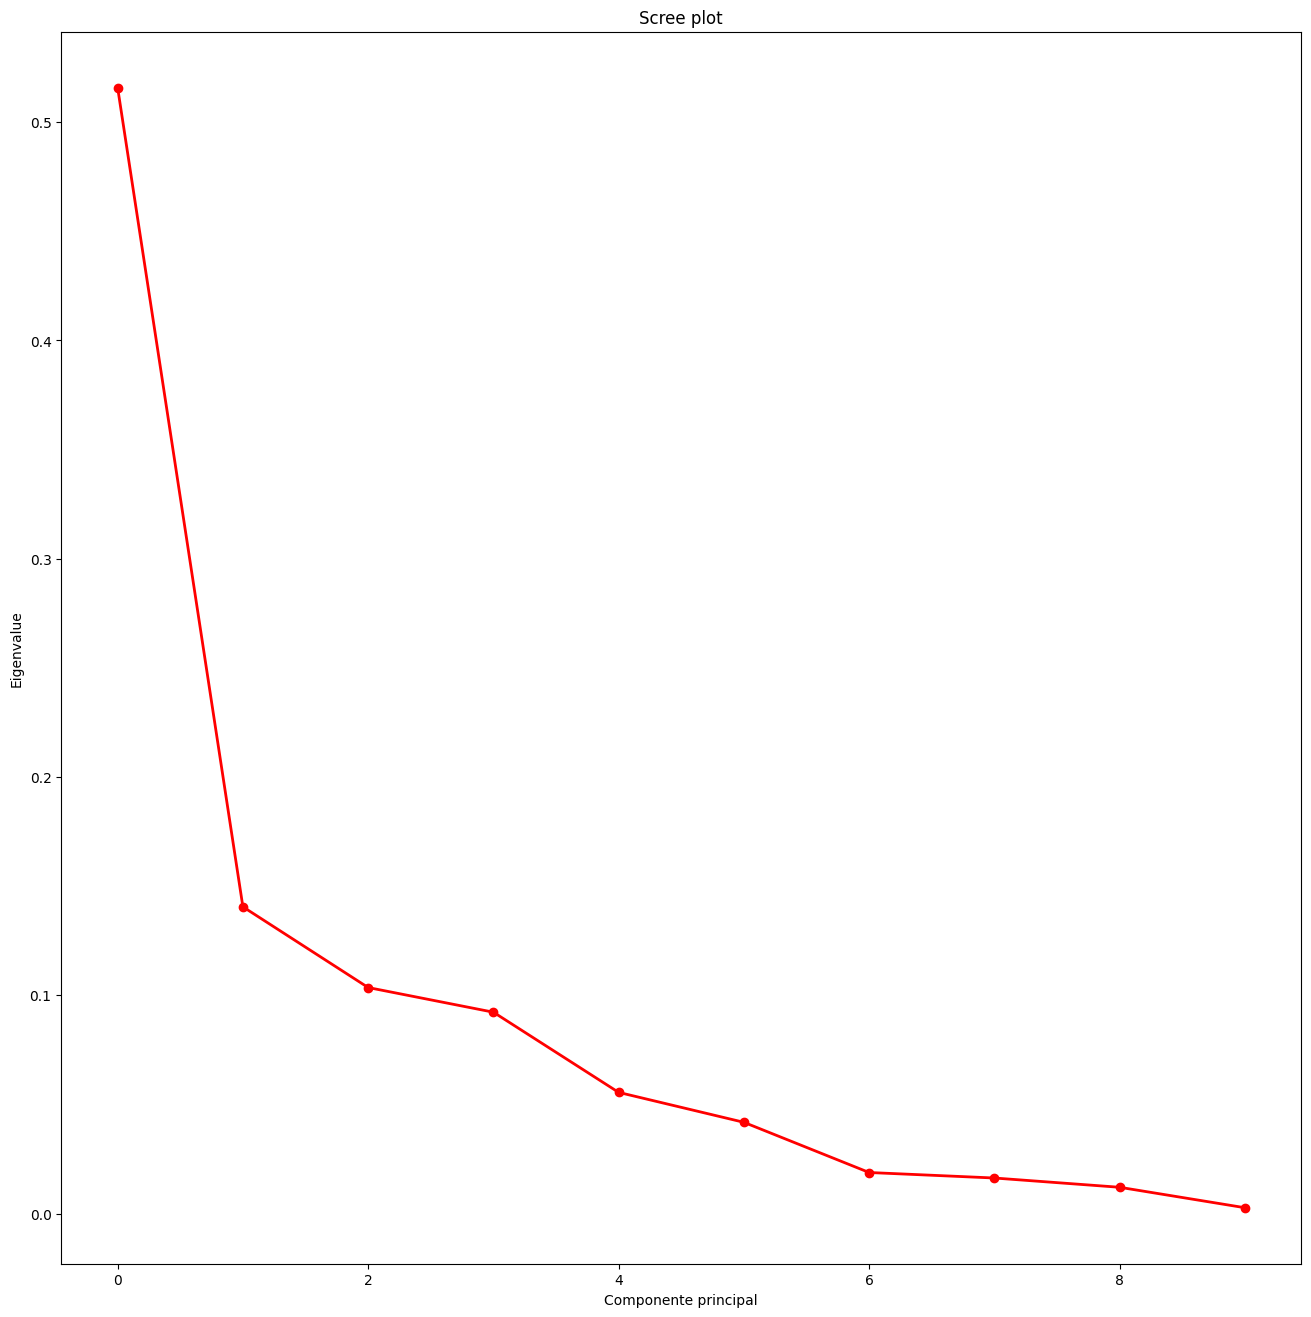

In [76]:
fig = plt.figure(figsize = (16, 16))

plt.plot(pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree plot')
plt.xlabel('Componente principal')
plt.ylabel('Eigenvalue')

In [77]:
pca.transform(x)

array([[-3.70737673e+00, -1.54282149e+00,  6.75060457e-01,
         2.16134443e-01,  6.24657122e-01, -1.30574664e+00,
        -6.52915821e-01,  5.57566956e-01,  8.25472984e-01,
         3.94406114e-03],
       [-3.61786022e+00, -3.35461347e-01,  1.96296020e+00,
         1.79662789e-01,  1.45165731e+00, -8.09283080e-02,
         3.89728561e-01, -3.07979573e-01, -5.45886554e-01,
        -2.54418995e-01],
       [-2.72132809e+00, -6.41437652e-01, -3.00781917e-01,
        -4.28849038e-01, -3.73059787e-01,  1.48332375e+00,
        -6.02160104e-02,  1.38117872e+00, -4.35800976e-01,
         4.76644014e-02],
       [-2.87948778e+00, -6.81558008e-01,  2.90094397e-02,
        -3.78754093e-01, -4.77441340e-01,  1.69839542e+00,
        -1.93814164e-01, -7.32096824e-01,  7.08723247e-01,
         7.14984214e-02],
       [-2.52295870e+00, -6.54209278e-01, -3.89014672e-01,
        -1.36186285e+00, -5.67474198e-01, -1.23199206e-01,
         1.44379763e-01, -8.52438061e-01, -1.60405236e-01,
        -1.

In [78]:
pca1 = pca.transform(x)[:,0]
pca2 = pca.transform(x)[:,1]
pca3 = pca.transform(x)[:,2]
pca4 = pca.transform(x)[:,3]
pcall = pca.transform(x)

In [79]:
df['pca1'] = pca1
df['pca2'] = pca2
df['pca3'] = pca3
df['pca4'] = pca4

In [80]:
df.head()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Diphtheria,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,pca1,pca2,pca3,pca4
Year,,,,,,,,,,,,,,,,,,,,,
2014,59.9,271,64,0.01,7352358168,62,492,18.6,86,58,...,62,327582,17.5,17.5,0.476,10.0,-3.707377,-1.542821,0.675060,0.216134
2013,59.9,268,66,0.01,7321924272,64,430,18.1,89,62,...,64,31731688,17.7,17.7,0.470,9.9,-3.617860,-0.335461,1.962960,0.179663
2012,59.5,272,69,0.01,781842153,67,2787,17.6,93,67,...,67,3696958,17.9,18.0,0.463,9.8,-2.721328,-0.641438,-0.300782,-0.428849
2011,59.2,275,71,0.01,7097108703,68,3013,17.2,97,68,...,68,2978599,18.2,18.2,0.454,9.5,-2.879488,-0.681558,0.029009,-0.378754
2010,58.8,279,74,0.01,7967936736,66,1989,16.7,102,66,...,66,2883167,18.4,18.4,0.448,9.2,-2.522959,-0.654209,-0.389015,-1.361863


In [81]:
df.sort_values(by='pca1', ascending=False)

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Diphtheria,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,pca1,pca2,pca3,pca4
Year,,,,,,,,,,,,,,,,,,,,,
2000,54.8,321,88,0.01,1042496,62,6532,12.2,122,24,...,24,293756,2.3,2.5,0.338,5.5,5.248831,-2.315270,-0.414330,0.003888
2001,55.3,316,88,0.01,105747282,63,8762,12.6,122,35,...,33,2966463,2.1,2.4,0.340,5.9,4.876812,-2.674664,-0.323335,0.574416
2002,56.2,3,88,0.01,1688735091,64,2486,13.0,122,36,...,36,21979923,19.9,2.2,0.341,6.2,3.313971,0.990400,3.564008,-0.215763
2004,57.0,293,87,0.02,1529606643,67,466,13.8,120,5,...,5,24118979,19.5,19.7,0.381,6.8,2.282853,2.821008,0.046056,-2.063388
2003,56.7,295,87,0.01,1108905273,65,798,13.4,122,41,...,41,2364851,19.7,19.9,0.373,6.5,1.671187,1.124336,-0.900406,-1.279301
2006,57.3,295,84,0.03,1717151751,64,1990,14.7,116,58,...,58,2589345,19.2,19.3,0.405,8.1,0.333519,1.362547,-1.205448,1.980167
2005,57.3,291,85,0.02,1388647732,66,1296,14.2,118,58,...,58,257798,19.3,19.5,0.396,7.9,0.332761,1.221201,-1.495856,-0.239929
2007,57.5,295,82,0.02,1091015598,63,1141,15.2,113,63,...,63,26616792,19.0,19.1,0.415,8.4,-0.120573,1.319806,0.700780,2.655052
2008,58.1,287,80,0.03,2587392536,64,1599,15.7,110,64,...,64,2729431,18.8,18.9,0.433,8.7,-0.928221,0.963858,-1.312000,1.260400
